In [100]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
from geopy import distance
import requests
import json
import datetime
import math
import itertools
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from pulp import *
import seaborn as sn
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="myGeocoder")
#geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [137]:
rpd1="Irondequoit Police Department, 1300, Titus Ave, Rochester, NY, 14617"
rpd2="Police Department-Patrol Section Office, 630, North Clinton Avenue, Rochester, NY, 14605"
#rpd2="Goodman Section Office, 630, North Clinton Avenue, Rochester, NY, 14605"
rpd3="Lake Section, Rochester Police Department, 1099, Jay St 100D, Rochester, NY, 14611"
rpd3="Rochester Police Department Special Operations Division, 261, Child St, Rochester, NY, 14611"
rpd4="New York State Police - Troop E SP Rochester, 1155, Scottsville Rd, Rochester, NY, 14624"
rpd5="East Rochester Police Department, 317, Main St, East Rochester, NY, 14445"
rpd6="Brighton Police Department,2300, Elmwood Ave, Rochester, NY, 14618"
rpd7="Rochester Police Department, 184, Verona St, Rochester, NY, 14608"
rpd8="Rochester Police Department, 185, Exchange Boulevard, Rochester, NY, 14614"
rpd9="Central Section Rochester Police Department, 30, North Clinton Ave, Rochester, NY, 14604"

In [138]:
geolocator = Nominatim(user_agent="example app")

In [139]:
#geolocator.geocode(rpd1).point

In [140]:
import nltk 
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
def check_location(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text))):
        if hasattr(chunk, "label"):
            if chunk.label() == "GPE" or chunk.label() == "GSP":
                return "True"
    return "False"
text=rpd1
print(check_location(text))

text=rpd2
print(check_location(text))

text=rpd3
print(check_location(text))

text=rpd4
print(check_location(text))

text = rpd5
print(check_location(text))

text = rpd6
print(check_location(text))

text = rpd7
print(check_location(text))

text = rpd8
print(check_location(text))

text = rpd9
print(check_location(text))

True
True
False
True
True
True
False
False
True


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rochelleallan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/rochelleallan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/rochelleallan/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [141]:
PoliceSitelist = [rpd1,rpd2,rpd3,rpd4,rpd5,rpd6,rpd7,rpd8,rpd9]
pst= pd.DataFrame([rpd.split(",") for rpd in PoliceSitelist])
pst.rename(columns={0: 'Site Name',1: 'Code',2: 'Locality',3: 'Zone',4: 'State',5: 'Pin-Code'}, inplace=True)

In [142]:
pst

,Site Name,Code,Locality,Zone,State,Pin-Code
0,Irondequoit Police Department,1300,Titus Ave,Rochester,NY,14617
1,Police Department-Patrol Section Office,630,North Clinton Avenue,Rochester,NY,14605
2,Rochester Police Department Special Operations...,261,Child St,Rochester,NY,14611
3,New York State Police - Troop E SP Rochester,1155,Scottsville Rd,Rochester,NY,14624
4,East Rochester Police Department,317,Main St,East Rochester,NY,14445
5,Brighton Police Department,2300,Elmwood Ave,Rochester,NY,14618
6,Rochester Police Department,184,Verona St,Rochester,NY,14608
7,Rochester Police Department,185,Exchange Boulevard,Rochester,NY,14614
8,Central Section Rochester Police Department,30,North Clinton Ave,Rochester,NY,14604


In [143]:
pst['Address'] = pst['Code']+pst['Locality']+pst['Zone']+pst['State']+pst['Pin-Code']

In [144]:
pst

,Site Name,Code,Locality,Zone,State,Pin-Code,Address
0,Irondequoit Police Department,1300,Titus Ave,Rochester,NY,14617,1300 Titus Ave Rochester NY 14617
1,Police Department-Patrol Section Office,630,North Clinton Avenue,Rochester,NY,14605,630 North Clinton Avenue Rochester NY 14605
2,Rochester Police Department Special Operations...,261,Child St,Rochester,NY,14611,261 Child St Rochester NY 14611
3,New York State Police - Troop E SP Rochester,1155,Scottsville Rd,Rochester,NY,14624,1155 Scottsville Rd Rochester NY 14624
4,East Rochester Police Department,317,Main St,East Rochester,NY,14445,317 Main St East Rochester NY 14445
5,Brighton Police Department,2300,Elmwood Ave,Rochester,NY,14618,2300 Elmwood Ave Rochester NY 14618
6,Rochester Police Department,184,Verona St,Rochester,NY,14608,184 Verona St Rochester NY 14608
7,Rochester Police Department,185,Exchange Boulevard,Rochester,NY,14614,185 Exchange Boulevard Rochester NY 14614
8,Central Section Rochester Police Department,30,North Clinton Ave,Rochester,NY,14604,30 North Clinton Ave Rochester NY 14604


In [145]:
geolocator = Nominatim(user_agent="example app")

In [146]:
pst["loc"] = pst["Address"].apply(geolocator.geocode)

In [147]:
pst

,Site Name,Code,Locality,Zone,State,Pin-Code,Address,loc
0,Irondequoit Police Department,1300,Titus Ave,Rochester,NY,14617,1300 Titus Ave Rochester NY 14617,"(1300, Titus Avenue, Rochester, Monroe County,..."
1,Police Department-Patrol Section Office,630,North Clinton Avenue,Rochester,NY,14605,630 North Clinton Avenue Rochester NY 14605,"(City of Rochester Police Department, 630, Nor..."
2,Rochester Police Department Special Operations...,261,Child St,Rochester,NY,14611,261 Child St Rochester NY 14611,"(261, Child Street, JOSANA, Otis, Rochester, M..."
3,New York State Police - Troop E SP Rochester,1155,Scottsville Rd,Rochester,NY,14624,1155 Scottsville Rd Rochester NY 14624,"(1155, Scottsville Road, Rochester, Chili, Mon..."
4,East Rochester Police Department,317,Main St,East Rochester,NY,14445,317 Main St East Rochester NY 14445,"(East Rochester Public Library, 317, Main Stre..."
5,Brighton Police Department,2300,Elmwood Ave,Rochester,NY,14618,2300 Elmwood Ave Rochester NY 14618,"(Brighton Police Department, 2300, Elmwood Ave..."
6,Rochester Police Department,184,Verona St,Rochester,NY,14608,184 Verona St Rochester NY 14608,(Rochester Animal Services: Verona Street Anim...
7,Rochester Police Department,185,Exchange Boulevard,Rochester,NY,14614,185 Exchange Boulevard Rochester NY 14614,"(Rochester Public Safety Building, 185, Exchan..."
8,Central Section Rochester Police Department,30,North Clinton Ave,Rochester,NY,14604,30 North Clinton Ave Rochester NY 14604,"(30, North Clinton Avenue, Midtown District, R..."


In [148]:
geolocator.geocode("630 North Clinton Avenue Rochester NY 14605").point

Point(43.1688905, -77.6099545, 0.0)

In [149]:
pst["point"]= pst["loc"].apply(lambda loc: tuple(loc.point) if loc else None)

In [150]:
pst

,Site Name,Code,Locality,Zone,State,Pin-Code,Address,loc,point
0,Irondequoit Police Department,1300,Titus Ave,Rochester,NY,14617,1300 Titus Ave Rochester NY 14617,"(1300, Titus Avenue, Rochester, Monroe County,...","(43.2128319, -77.5818864, 0.0)"
1,Police Department-Patrol Section Office,630,North Clinton Avenue,Rochester,NY,14605,630 North Clinton Avenue Rochester NY 14605,"(City of Rochester Police Department, 630, Nor...","(43.1688905, -77.6099545, 0.0)"
2,Rochester Police Department Special Operations...,261,Child St,Rochester,NY,14611,261 Child St Rochester NY 14611,"(261, Child Street, JOSANA, Otis, Rochester, M...","(43.1571782, -77.6392636, 0.0)"
3,New York State Police - Troop E SP Rochester,1155,Scottsville Rd,Rochester,NY,14624,1155 Scottsville Rd Rochester NY 14624,"(1155, Scottsville Road, Rochester, Chili, Mon...","(43.1211255, -77.6519564, 0.0)"
4,East Rochester Police Department,317,Main St,East Rochester,NY,14445,317 Main St East Rochester NY 14445,"(East Rochester Public Library, 317, Main Stre...","(43.1125714, -77.4856604, 0.0)"
5,Brighton Police Department,2300,Elmwood Ave,Rochester,NY,14618,2300 Elmwood Ave Rochester NY 14618,"(Brighton Police Department, 2300, Elmwood Ave...","(43.1268917, -77.5750879, 0.0)"
6,Rochester Police Department,184,Verona St,Rochester,NY,14608,184 Verona St Rochester NY 14608,(Rochester Animal Services: Verona Street Anim...,"(43.1606871, -77.6220447, 0.0)"
7,Rochester Police Department,185,Exchange Boulevard,Rochester,NY,14614,185 Exchange Boulevard Rochester NY 14614,"(Rochester Public Safety Building, 185, Exchan...","(43.1518681, -77.61198783041527, 0.0)"
8,Central Section Rochester Police Department,30,North Clinton Ave,Rochester,NY,14604,30 North Clinton Ave Rochester NY 14604,"(30, North Clinton Avenue, Midtown District, R...","(43.1578983, -77.6065316, 0.0)"


In [151]:
pst[['lat', 'lon', 'altitude']] = pd.DataFrame(pst['point'].to_list(), index=pst.index)

In [152]:
pst

,Site Name,Code,Locality,Zone,State,Pin-Code,Address,loc,point,lat,lon,altitude
0,Irondequoit Police Department,1300,Titus Ave,Rochester,NY,14617,1300 Titus Ave Rochester NY 14617,"(1300, Titus Avenue, Rochester, Monroe County,...","(43.2128319, -77.5818864, 0.0)",43.212832,-77.581886,0.0
1,Police Department-Patrol Section Office,630,North Clinton Avenue,Rochester,NY,14605,630 North Clinton Avenue Rochester NY 14605,"(City of Rochester Police Department, 630, Nor...","(43.1688905, -77.6099545, 0.0)",43.168891,-77.609955,0.0
2,Rochester Police Department Special Operations...,261,Child St,Rochester,NY,14611,261 Child St Rochester NY 14611,"(261, Child Street, JOSANA, Otis, Rochester, M...","(43.1571782, -77.6392636, 0.0)",43.157178,-77.639264,0.0
3,New York State Police - Troop E SP Rochester,1155,Scottsville Rd,Rochester,NY,14624,1155 Scottsville Rd Rochester NY 14624,"(1155, Scottsville Road, Rochester, Chili, Mon...","(43.1211255, -77.6519564, 0.0)",43.121125,-77.651956,0.0
4,East Rochester Police Department,317,Main St,East Rochester,NY,14445,317 Main St East Rochester NY 14445,"(East Rochester Public Library, 317, Main Stre...","(43.1125714, -77.4856604, 0.0)",43.112571,-77.485660,0.0
5,Brighton Police Department,2300,Elmwood Ave,Rochester,NY,14618,2300 Elmwood Ave Rochester NY 14618,"(Brighton Police Department, 2300, Elmwood Ave...","(43.1268917, -77.5750879, 0.0)",43.126892,-77.575088,0.0
6,Rochester Police Department,184,Verona St,Rochester,NY,14608,184 Verona St Rochester NY 14608,(Rochester Animal Services: Verona Street Anim...,"(43.1606871, -77.6220447, 0.0)",43.160687,-77.622045,0.0
7,Rochester Police Department,185,Exchange Boulevard,Rochester,NY,14614,185 Exchange Boulevard Rochester NY 14614,"(Rochester Public Safety Building, 185, Exchan...","(43.1518681, -77.61198783041527, 0.0)",43.151868,-77.611988,0.0
8,Central Section Rochester Police Department,30,North Clinton Ave,Rochester,NY,14604,30 North Clinton Ave Rochester NY 14604,"(30, North Clinton Avenue, Midtown District, R...","(43.1578983, -77.6065316, 0.0)",43.157898,-77.606532,0.0


In [153]:
import folium
map1 = folium.Map(
    location=[43.1125714, -77.4856604],
    tiles='cartodbpositron',
    zoom_start=12,
)
pst.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]]).add_to(map1), axis=1)
map1

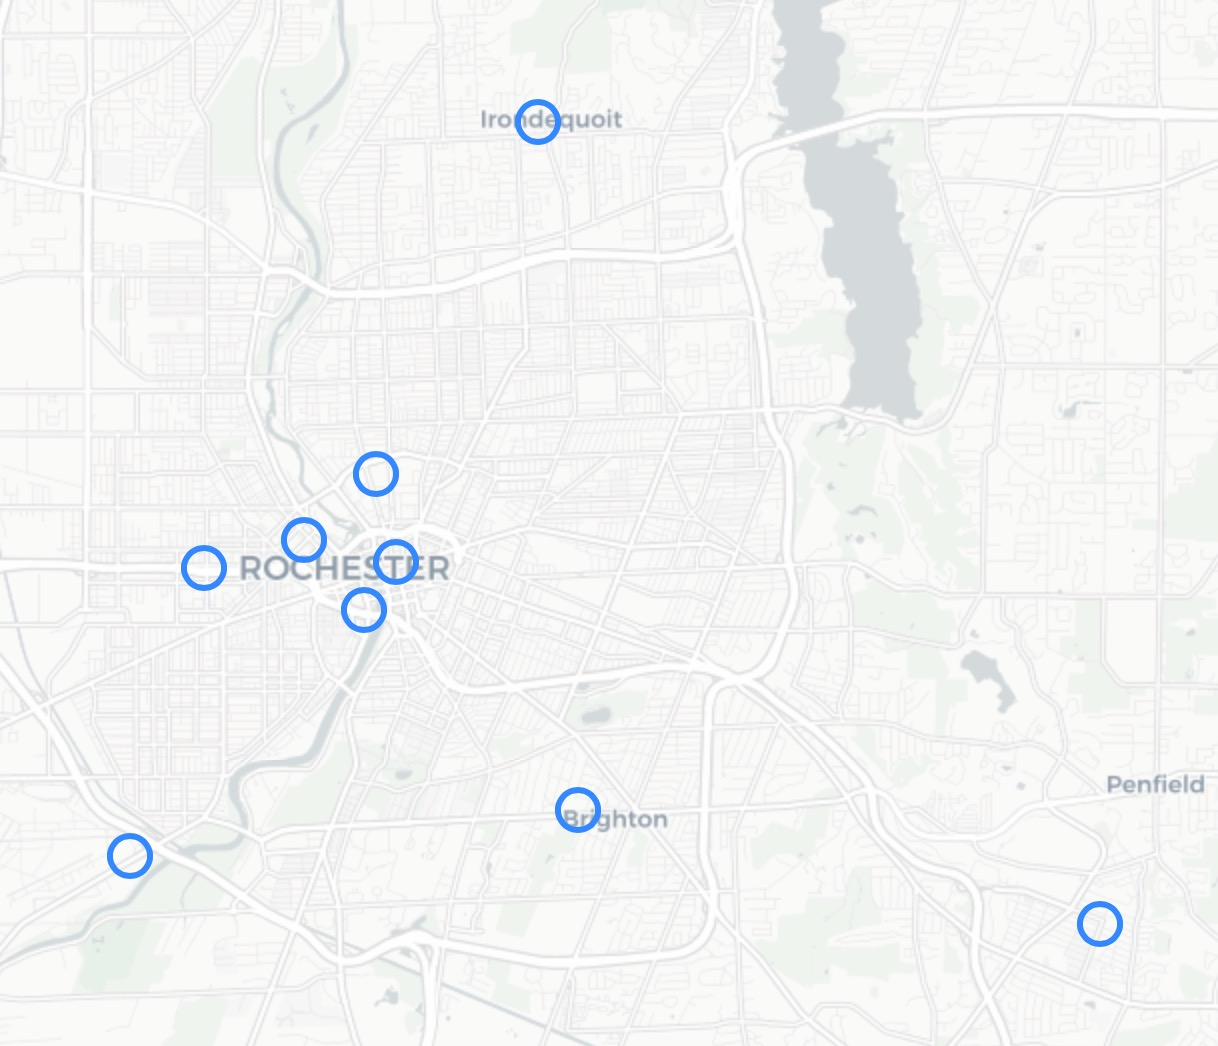

In [155]:
from IPython.display import Image
Image(filename = "PoliceStationSites.jpeg", width = 600, height = 300)